In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 图片翻转　cv2.flip()

> cv2.flip(src, flipCode[, dst]) → dst

* src: 原始图像矩阵；
* dst: 变换后的矩阵；
* flipMode: 翻转模式，有三种模式
    * 0 --- 垂直方向翻转；  1----- 水平方向翻转；  -1：水平、垂直方向同时翻转
    > flipCode==0垂直翻转（沿X轴翻转），flipCode>0水平翻转（沿Y轴翻转），flipCode<0水平垂直翻转（先沿X轴翻转，再沿Y轴翻转，等价于旋转180°）




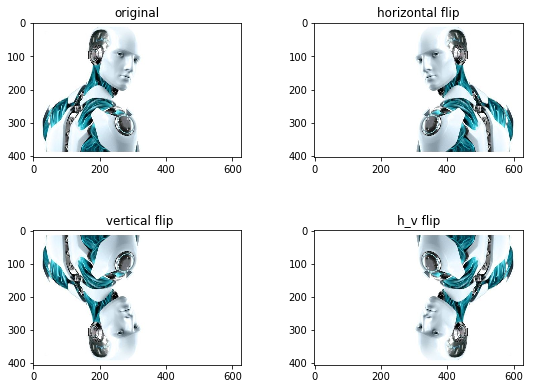

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

image = cv2.imread("aier.jpg")
# Flipped Horizontally 水平翻转
h_flip = cv2.flip(image, 1)
# Flipped Vertically 垂直翻转
v_flip = cv2.flip(image, 0)
# Flipped Horizontally & Vertically 水平垂直翻转
hv_flip = cv2.flip(image, -1)

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(image[:,:,::-1])
plt.title('original')

plt.subplot(222)
plt.imshow(h_flip[:,:,::-1])
plt.title('horizontal flip')

plt.subplot(223)
plt.imshow(v_flip[:,:,::-1])
plt.title(' vertical flip')

plt.subplot(224)
plt.imshow(hv_flip[:,:,::-1])
plt.title('h_v flip')
# 调整子图间距
# plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.subplots_adjust(top=0.8, bottom=0.08, left=0.10, right=0.95, hspace=0,
                    wspace=0.35)
# plt.tight_layout()
plt.show()

## 图像平移　旋转　仿射

> cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

```
src	input image.
dst	output image that has the size dsize and the same type as src .
M	2×3 transformation matrix.
dsize	size of the output image.
flags	combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
borderMode	pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
borderValue	value used in case of a constant border; by default, it is 0.
```
> cv2.getRotationMatrix2D(center, angle, scale)
函数有三个参数：

* center：图片的旋转中心
* angle：旋转角度
* scale：缩放比例，该例中0.5表示我们缩小一半

[[ 6.123234e-17  1.000000e+00  1.115000e+02]
 [-1.000000e+00  6.123234e-17  5.165000e+02]]


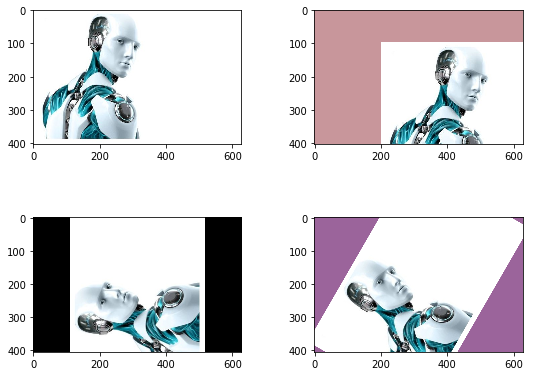

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('aier.jpg')
rows,cols = img.shape[:2]

# 定义平移矩阵，需要是numpy的float32类型
# x轴平移200，y轴平移100, 2*3矩阵
M = np.float32([[1, 0, 200], [0, 1, 100]])
# 用仿射变换实现平移
img_s = cv2.warpAffine(img, M, (cols, rows), borderValue=(155, 150, 200))

# 第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例, 生成一２＊３的矩阵
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
M1 = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
M2 = cv2.getRotationMatrix2D((cols/2,rows/2),60,1)
print(M)
'''
[[ 6.123234e-17  1.000000e+00  1.500000e+02]
 [-1.000000e+00  6.123234e-17  6.500000e+02]]
'''
# 第三个参数：变换后的图像大小
img_tra = cv2.warpAffine(img,M,(cols,rows))
img_tra1 = cv2.warpAffine(img,M1,(cols,rows))
img_tra2 = cv2.warpAffine(img,M2,(cols,rows), borderValue=(155, 100, 155))

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(img[:,:,::-1])

plt.subplot(222)
plt.imshow(img_s[:,:,::-1])

plt.subplot(223)
plt.imshow(img_tra[:,:,::-1])

plt.subplot(224)
plt.imshow(img_tra2[:,:,::-1])

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.10, right=0.95, hspace=0,
                    wspace=0.35)
plt.show()


### 仿射

图像的旋转加上拉升就是**图像仿射变换**，仿射变化也是需要一个M矩阵就可以，但是由于仿射变换比较复杂，一般直接找很难找到这个矩阵，opencv提供了根据变换前后三个点的对应关系来自动求解M。这个函数是 
M=cv2.getAffineTransform(pos1,pos2),其中两个位置就是变换前后的对应位置关系。输出的就是仿射矩阵M。然后在使用函数cv2.warpAffine()。

> cv.GetAffineTransform(src, dst, mapMatrix) → None


* Parameters: 变换前的三个点与其对应的变换后的点. 	 
    * src – Coordinates of triangle vertices in the source image.
    * dst – Coordinates of the corresponding triangle vertices in the destination image.
    
The function calculates the 2*3 matrix of an affine transform.

AffineMatrix = cv2.getAffineTransform(np.array(SrcPointsA),
                                      np.array(CanvasPointsA))

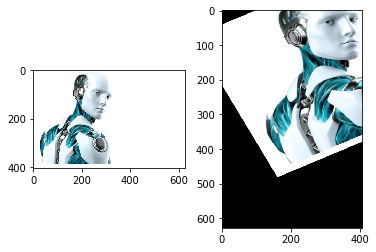

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('aier.jpg')
rows,cols = img.shape[:2]
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,20],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
#第三个参数：变换后的图像大小
res = cv2.warpAffine(img,M,(rows,cols))
plt.subplot(121)
plt.imshow(img[:,:,::-1])

plt.subplot(122)
plt.imshow(res[:,:,::-1])

plt.show()

## 透视　Perspective

视角变换，需要一个3*3变换矩阵。在变换前后要保证直线还是直线。
构建此矩阵需要在输入图像中找寻4个点，以及在输出图像中对应的位置。这四个点中的任意三个点不能共线。
```
## pts1 ==> pts2
pts1=np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2=np.float32([[0,0],[300,0],[0,300],[300,300]])
M=cv2.getPerspectiveTransform(pts1,pts2)
```

**cv2.getPerspectiveTransform(np.array(SrcPointsA), np.array(CanvasPointsA))**

> cv2.getPerspectiveTransform(src, dst) → retval

**cv2.warpPerspective(Img, PerspectiveMatrix, (300, 300))**
> cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst

```
src – input image.
dst – output image that has the size dsize and the same type as src .
M – 3*3 transformation matrix.
dsize – size of the output image.
flags – combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( dst ---> src ).
borderMode – pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
borderValue – value used in case of a constant border; by default, it equals 0.
```

[[ 9.70306451e-01 -8.63623543e-02 -5.39053495e+01]
 [-1.30451205e-15  7.52889719e-01 -3.76444859e+00]
 [ 2.63129379e-05 -1.12890411e-04  1.00000000e+00]]


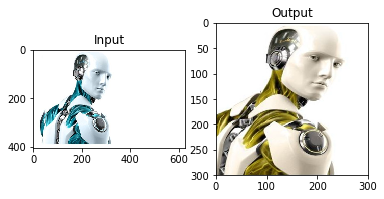

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img=cv2.imread('aier.jpg')
rows,cols,ch=img.shape
pts1=np.float32([[56,5],[368,5],[90,387],[389,390]])
pts2=np.float32([[0,0],[300,0],[0,300],[300,300]])
M=cv2.getPerspectiveTransform(pts1,pts2)
print(M)
dst=cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 取得图像某区域数据，直接利用np的array进行切片取值即可

405


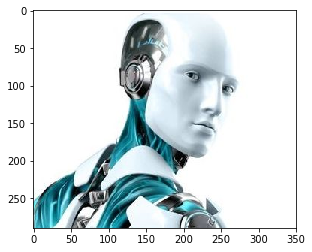

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('aier.jpg')
rows,cols,ch = img.shape
print(rows)

crop_img = img[10:300, 50:400]
plt.imshow(crop_img[:,:,::-1])

## 图像算数:相加、相减、与、或、异或、非

图像与运算cv2.bitwise_and，图像或运算cv2.bitwise_or，图像非运算cv2.bitwise_not与图像异或运算cv2.bitwise_xor。

1. 图像与运算-cv2.bitwise_and(src1, src2, dst=None, mask=one)
2. 图像或运算-cv2.bitwise_or(src1, src2, dst=None, mask=None)
3. 图像非运算-cv2.bitwise_not(src1, src2, dst=None, mask=None)
    * 图像非运算的效果：一个二值图，将黑色转为白色，白色转为黑色。
4. 图像异或运算-cv2.bitwise_xor(src1, src2, dst=None, mask=None)

这四个运算，最少要有两个参数，即src1,src2；dst：参数返回结果可选，mask：参数也是可选的，指定msk区域进行操作。



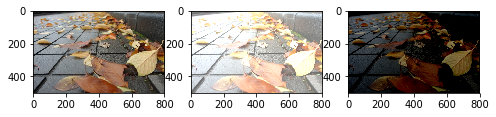

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('image800.jpg')
# 构建一矩阵　进行普通的cv2.add 与　cv2.substract运算
M = np.ones(img.shape, dtype='uint8') * 100
added = cv2.add(img, M)
subtracted = cv2.subtract(img, M)

plt.figure(figsize=(8,8))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.imshow(added[:,:,::-1])
plt.subplot(133)
plt.imshow(subtracted[:,:,::-1])

plt.show()

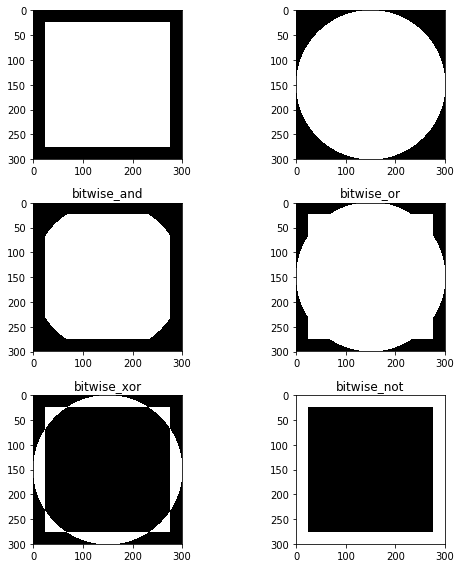

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

# 生成一　矩形图形
rectangle = np.zeros((300, 300, 3), dtype='uint8')
cv2.rectangle(rectangle, (25, 25), (275, 275), (255,255,255), -1)

circle = np.zeros((300, 300, 3), dtype='uint8')
cv2.circle(circle, (150, 150), 150, (255,255,255), -1)

plt.figure(figsize=(8,8))
plt.subplot(321)
plt.imshow(rectangle)

plt.subplot(322)
plt.imshow(circle[:,:,::-1])

# 位运算
bitwise_and = cv2.bitwise_and(rectangle, circle)
plt.subplot(323)
plt.imshow(bitwise_and[:,:,::-1])
plt.title('bitwise_and')

bitwise_or = cv2.bitwise_or(rectangle, circle)
plt.subplot(324)
plt.imshow(bitwise_or[:,:,::-1])
plt.title('bitwise_or')

bitwise_xor = cv2.bitwise_xor(rectangle, circle)
plt.subplot(325)
plt.imshow(bitwise_xor[:,:,::-1])
plt.title('bitwise_xor')

bitwise_not = cv2.bitwise_not(rectangle)
plt.subplot(326)
plt.imshow(bitwise_not[:,:,::-1])
plt.title('bitwise_not')

plt.tight_layout()

plt.show()

## 图像增加边界

> cv2.copyMakeBorder(src,top, bottom, left, right ,borderType,value)

* src:源图像
* top,bottem,left,right: 分别表示四个方向上边界的长度

* borderType: 边界的类型
  有以下几种：
    * BORDER_REFLICATE　　　  # 直接用边界的颜色填充， aaaaaa | abcdefg | gggg
    * BORDER_REFLECT　　　　  # 倒映，abcdefg | gfedcbamn | nmabcd
    * BORDER_REFLECT_101　　 # 倒映，和上面类似，但在倒映时，会把边界空开，abcdefg | egfedcbamne | nmabcd
    * BORDER_WRAP　　　　  　# 额。类似于这种方式abcdf | mmabcdf | mmabcd
    * BORDER_CONSTANT　　　　# 常量，增加的变量通通为value色 
* value - Color of border if border type is cv.BORDER_CONSTANT

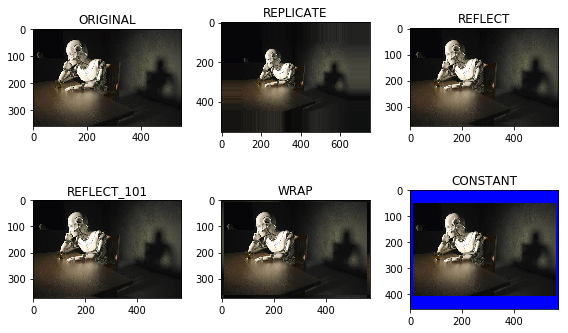

In [58]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


BLUE = [0,0,255]
img1 = cv.imread('ai.jpg')

# matplotlib 里的是 RGB，而opencv里的图片通道数据是 BGR
b,g,r = cv.split(img1)
img1 = cv.merge((r,g,b))

replicate = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,50,50,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.figure(figsize=(8,5))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.tight_layout()

plt.show()

## 图像掩膜处理
mask处理

(405, 628)


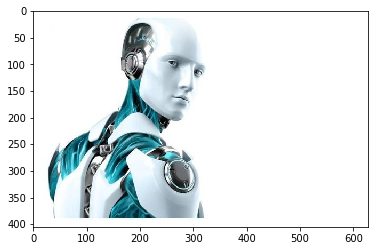

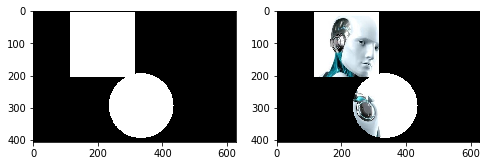

In [43]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('aier.jpg')

mask = np.zeros(img.shape[:2], dtype='uint8')
(c_x, c_y) = (img.shape[1]//2, img.shape[0]//2)

cv2.rectangle(mask, (c_x-200, c_y-200), (c_x, c_y), 255, -1)
cv2.circle(mask, (c_x+20, c_y+90), 100, 255, -1)

print(mask.shape)

masked = cv2.bitwise_and(img, img, mask=mask)
masked = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(img[:,:,::-1])

plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(mask, cmap=plt.cm.gray)

plt.subplot(222)
plt.imshow(masked[:,:,::-1])

plt.show()

## 色彩空间

[opencv︱图像的色彩空間](https://blog.csdn.net/sinat_26917383/article/details/70860910)

opencv中有多种色彩空间，包括 RGB、HSI、HSL、HSV、HSB、YCrCb、CIE XYZ、CIE Lab8种

BGR<->Gray 和 BGR<->HSV

> cv2.cvtColor(img, flag)

* img，源图片
* flag, 色彩空间转换类型
    * flag是转换类型：cv2.COLOR_BGR2GRAY,cv2.COLOR_BGR2HSV等　
```
#获取颜色转换中所有可以使用的flag
def getColorConvertFlag():
    # dir() 查找module下的所有类
    flags = [i for i in dir(cv2) if i.startswith("COLOR_") ]
    print(flags)
```


#### HSV(Hue , Saturation , Value):色调，饱和度，明度
* n色度H:用角度度量，取值范围为0~360，红色开始按逆时针方向计算，红色为0度，绿色为120度，蓝色为240度

* 饱和度S:接近光谱色的程度，颜色可以看成是光谱色与白色混合结果，光谱色占的比例愈大，颜色接近光谱色的程度越高，颜色饱和度就越高。光谱色中白色成分为0，饱和度达到最高，取值范围0%~100%，值越大，颜色越饱和

* 明度V:表示颜色明亮的程度，对于光源色，明度值与发光体的光亮度有关；对于物体色，与物体的透射比有关，取值范围为0%(黑)~100%(白)

RGB面向硬件，HSV面向用户


在Opencv中
H色度取值范围是[0,179]
S饱和度的取值范围是[0,255]
V明度的取值范围是[0,255]
拿opencv的HSV值与其他软件的HSV值进行对比时，要归一化.


> cv2.inRange(src , lowerb , upperb[,dst])
        
作用：更改函数对某个单通道中的元素检查其值是否在范围中

src:输入数组，lowerb:包含低边界的数组，upperb:包含高边界的数组

dst:输出数组, 如果src(I)符合范围，则dst(I)被设置为255，也就是说dst返回的是非黑即白的图像，而且符合要求 的部分是白色的

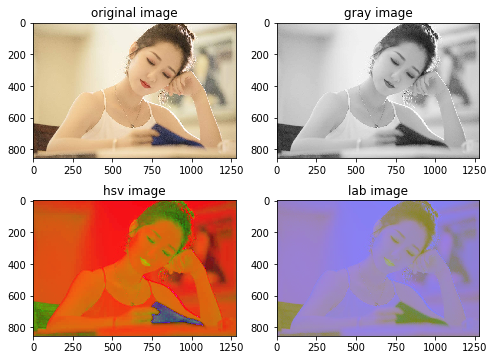

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('person.jpg')

cvt_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cvt_img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cvt_img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(img[:,:,::-1])
plt.title('original image')
plt.subplot(222)
plt.imshow(cvt_img_gray, cmap=plt.cm.gray)
plt.title('gray image')
plt.subplot(223)
plt.imshow(cvt_img_hsv[:,:,::-1])
plt.title('hsv image')
plt.subplot(224)
plt.imshow(cvt_img_lab[:,:,::-1])
plt.title('lab image')

plt.show()